<a href="https://colab.research.google.com/github/leamarcec/Traffic_sign_classification/blob/main/klasifikacija_prometnih_znakova_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Klasifikacija prometnih znakova**

**1. UVOD**
U suvremenom prometovanju prometni znakovi zauzimaju vrlo važan položaj za sve sudionike u prometu. Postoji niz prometnih znakova i tumačenja istih te se oni mogu
svrstati u tri najopćenitije kategorije. To su: znakovi izričitih naredbi, znakovi opasnosti i znakovi obavijesti. Pojavom novih, suvremenih vozila na višu razinu dolazi i
samo upravljanje vozilom. Najsuvremenija vozila današnjice mogu prometovati i bez vozača kao fizičke osobe. Pri tome vozilima upravljaju razni izuzetno napredni sustavi
umjetne inteligencije koji se sastoje od niza komponenti, a jedna od njih je i pravovremeno raspoznavanje prometnih znakova na cesti. Da bi to bilo moguće potrebno je
trenirati sustav kako bi bio što efikasniji, a to je i tema ovog projekta - klasifikacija prometnih znakova. U projektu će biti prikazana klasifikacija prometnih znakova
s obzirom na njihovu namjenu u prometu. Postoje tri klase u koje će se razvrstavati prometni znakovi, a to su već ranije spomenuti znakovi izričitih naredbi, znakovi
obavijesti i znakovi opasnosti. Svaku od tih skupina znakova jednako je važno razumijeti i slijediti u prometu kako bi se on neometano odvijao.

  **2. PRIKUPLJANJE PODATAKA**
Podatci korišteni u ovom projektu preuzeti su sa sljedeće adrese: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign. Ovi podatci u
originalnoj(preuzetoj) verziji bili su raspoređeni u četrdesetak mapa koje su predstavljale razne klase. Naknadno podatci su obrađeni na način da su svrstani u tri ranije navedene kategorije(mape). Također, skup je smanjen zbog potreba projekta. Trening skup podataka sastoji se od 16 524 slike (znakovi izričitih naredbi - 8 856 slika, znakovi obavijesti - 3 240 slika, znakovi opasnosti - 4 428 slika), dok se testni skup podataka sastoji od 2 039 slika.
Nakon raspoređivanja slika u pripadajuće mape, .zip datoteka sa svim slikama učitana je na vlasititi Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Gornja sintaksa preuzeta je s adrese: https://colab.research.google.com/notebooks/io.ipynb.
Koristi se za pristup Google Drive-u te je prilikom pokretanja naredbe bila potrebna ponovna prijava na google korisnički račun.

Nakon uspješnog pristupa Google Drive-u potrebno je doći do preuzetih slika i raspakirati ih u zasebnu mapu. Spomenuta mapa nosi naziv "tmp".
Za dohvat podataka o broju datoteka koristi se funkcija "len", a prije toga potrebno je uključiti dodatne funkcije (zipfile - omogućuje raspakiravanje sadržaja, os - za pristup datotekama), izvor: skripta iz vježbi iz kolegija Neuronske mreže i duboko učenje).

In [ ]:
import os
import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/images.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
len(os.listdir('/tmp/images/'))

6

In [ ]:
base_dir = '/tmp/images/'

train_directory = os.path.join(base_dir, 'Train')

validation_directory = os.path.join(base_dir, 'Test')

Definiranje direktorija u kojem su trening i test slike (izvor: vježbe):

In [ ]:
# Direktorij sa trening slikama koje predstavljaju znakove izricitih naredbi
train_class11_dir = os.path.join(train_directory, 'znakovi-izricitih-naredbi')

# Direktorij sa trening slikama koje predstavljaju znakove obavijesti
train_class22_dir = os.path.join(train_directory, 'znakovi-obavijesti')

# Direktorij sa trening slikama koje predstavljaju znakove opasnosti
train_class33_dir = os.path.join(train_directory, 'znakovi-opasnosti')

# Direktorij sa test slikama koje predstavljaju znakove izricitih naredbi
test_directory1 = os.path.join(validation_directory, 'znakovi-izricitih-naredbi')

# Direktorij sa test slikama koje predstavljaju znakove obavijesti
test_directory2 = os.path.join(validation_directory, 'znakovi-obavijesti')

# Direktorij sa test slikama koje predstavljaju znakove opasnosti
test_directory3 = os.path.join(validation_directory, 'znakovi-opasnosti')

Pomoću sljedećih naredbi može se provjeriti kako izgledaju imena 5 datoteka iz svake skupine trening podataka(izvor:vježbe):

In [ ]:
train_class1_names = os.listdir(train_class11_dir)
print(train_class1_names[:5])

train_class2_names = os.listdir(train_class22_dir)
print(train_class2_names[:5])

train_class3_names = os.listdir(train_class33_dir)
print(train_class3_names[:5])

test_names1 = os.listdir(test_directory1)
print(test_names1[:5])

test_names2 = os.listdir(test_directory2)
print(test_names2[:5])

test_names3 = os.listdir(test_directory3)
print(test_names3[:5])

['00033_00007_00009.png', '00001_00005_00019.png', '00013_00010_00021.png', '00013_00052_00023.png', '00014_00003_00027.png']
['00012_00063_00024.png', '00012_00020_00014.png', '00042_00003_00002.png', '00006_00004_00028.png', '00012_00031_00026.png']
['00011_00043_00006.png', '00025_00043_00003.png', '00029_00007_00011.png', '00031_00014_00000.png', '00023_00011_00021.png']
['02310.png', '00089.png', '00177.png', '02279.png', '02451.png']
['02499.png', '02270.png', '00646.png', '01002.png', '03501.png']
['00233.png', '00134.png', '01256.png', '00879.png', '00613.png']


Sljedeće naredbe daju nam informaciju o tome koliko slika se nalazi u svakoj od skupina trening slika te koliko postoji testnih slika za svaku klasu(izvor: vježbe - Horse or Human):

In [ ]:
print('Total number of training images of traffic signs with explicit commands:', len(os.listdir(train_class11_dir)))
print('Total number of training images of traffic signs with road notifications:', len(os.listdir(train_class22_dir)))
print('Total number of training images of danger traffic signs:', len(os.listdir(train_class33_dir)))

print('Total number of test images of traffic signs with explicit commands:', len(os.listdir(test_directory1)))
print('Total number of test images of traffic signs with road notifications:', len(os.listdir(test_directory2)))
print('Total number of test images of danger traffic signs:', len(os.listdir(test_directory3)))

Total number of training images of traffic signs with explicit commands: 8856
Total number of training images of traffic signs with road notifications: 3240
Total number of training images of danger traffic signs: 4428
Total number of test images of traffic signs with explicit commands: 1698
Total number of test images of traffic signs with road notifications: 123
Total number of test images of danger traffic signs: 218


Prije samog stvaranja modela poželjno je imati uvid u skup podataka nad kojima se odvija obrada. Koristeći biblioteku Matplotlib prikazano je 16 slika iz skupa podataka u grafu dimenzija 4x4.
Matplotlib je biblioteka koja se koristi za statične, animirane i interaktivne vizualizacije u programskom jeziku Python (izvor: https://matplotlib.org/)
* kod je preuzet iz vježbe Horse or Human

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parametri za graf dimenzija 4x4
nrows = 4
ncols = 4

# Index za prolazak kroz slike
pic_index = 0

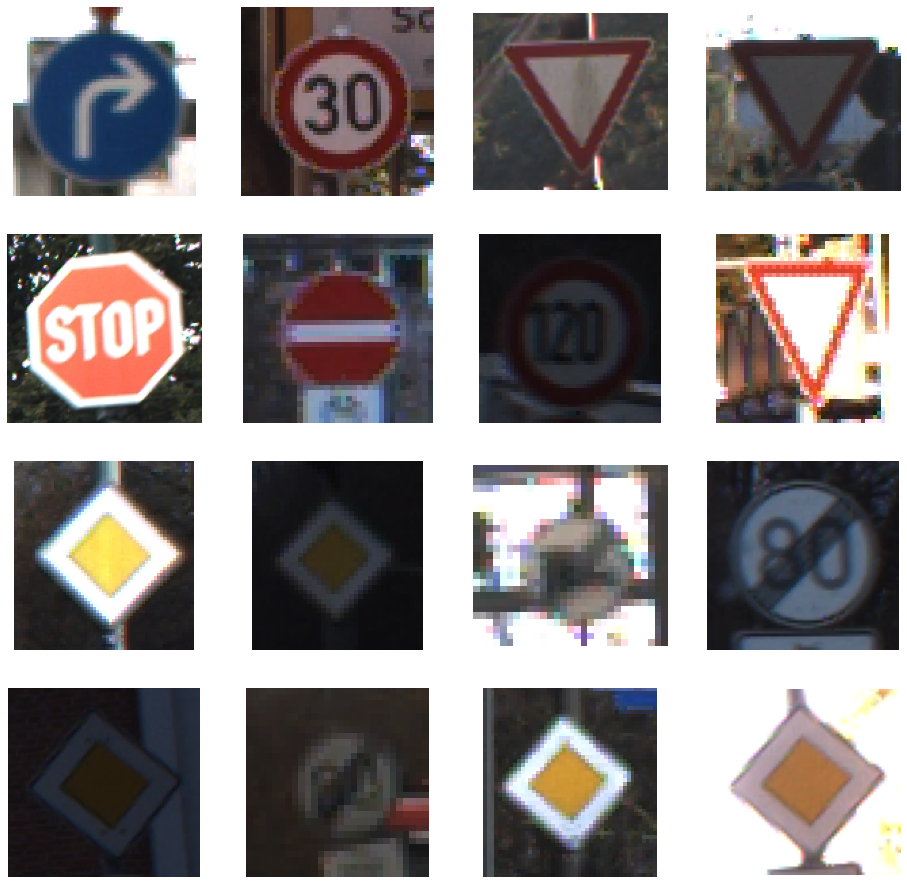

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_sign1_pix = [os.path.join(train_class11_dir, fname)
                for fname in train_class1_names[pic_index-8:pic_index]]
next_sign2_pix = [os.path.join(train_class22_dir, fname)
                for fname in train_class2_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_sign1_pix+next_sign2_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Sljedeći korak je izgradnja modela. Za taj postupak biti će potrebna Tensorflow bibioteka. To je open source biblioteka koja se koristi za numeričko računanje i strojno učenje velikih razmjera(izvor: https://www.tensorflow.org/resources/learn-ml?gclid=Cj0KCQjw6J-SBhCrARIsAH0yMZjG_Et5NLeQb0_7EmynBVLNwlupopok_o3Z5qk2-2bpo_wxqtCdLMwaAsS4EALw_wcB).
Slike koje se nalaze u korištenom skupu podataka nisu istih domenzija pa ih je potrebno postaviti na iste dimenzije kako bi se treniranje što uspješnije provelo. To se radi pomoću niza sljedećih naredbi (izvor: vježbe - Horse or Human).

**Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      # sklairanje slika
      rescale=1./255,

      #rotiranje 30%
      rotation_range=30,

      # random razvlacenje u sirinu za 30%
      width_shift_range=0.3,

      # random razvlacenje u visinu 30%
      height_shift_range=0.3,

      #okretanje slike horizontalno
      horizontal_flip=True
      )

# sklairanje slika
validation_datagen = ImageDataGenerator(
      rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_directory,

        # nove postavljene dimenzije slika
        target_size=(150, 150),

        # velicina mini batcha
        batch_size=32,

        # buduci da postoje tri klase, nije moguce postaviti class_mode na binary kao u primjeru
        # Horse or Human, vec mora biti categorical
        # izvor: https://stackoverflow.com/questions/59439128/what-does-class-mode-parameter-in-keras-image-gen-flow-from-directory-signify
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_directory,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 16524 images belonging to 3 classes.
Found 2039 images belonging to 3 classes.


**3. IZGRADNJA MODELA**
Koristi se konvolucijska neuronska mreža iz razloga što ima mnogo prednosti u odnosu na primjerice linerani klasifikator. Korištenjem konvolucijskih slojeva može se očuvati prostorna struktura. Dodaju se i aktivacijske funkcije kako bi se postigla nelinearnost. U ovom modelu najprije će se koristiti ReLu aktivacijska funkcija iz razloga jer nema zasićenja u +regiji, pogodna je za računalni vid i konvergira puno brže od od nekih drugih funkcija.
Za razliku od primjera "Horse or Human" ovdje nije prikladno koristiti Sigmodinu aktivacijsku funkciju na posljednjem (Dense) sloju jer postoje tri klase, a ne dvije kao u spomenutom primjeru. Sigmoidna funkcija svodi vrijednosti u raspon [0,1] što nije pogodno za ovaj model. Korištenjem naredbe "Dropout(0.5)" isključuje se 50% neurona, odnosno njihove vrijednosti stavljaju se na nulu, kako ne bi došlo do pretreniranosti(izvor: predavanja i vlastite bilješke).

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([

    # Prvi konvolucijski sloj
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Drugi konvolucijski sloj
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),

    # Treci konvolucijski sloj
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),

    # Cetvrti konvolucijski sloj
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Peti konvolucijski sloj
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # Skriveni sloj
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 dropout_3 (Dropout)         (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)       

Za optimizator je odabran Adam i learining rate 1e-3 iz razloga jer je to dobra startna pozicija za manje modele. On se bazira na brzini i kvadratu gradijenta. Potencijalni problem se javlja ako je learning rate prevelik pa se može zakoračiti predaleko (izvor: predavanja i vlastite bilješke).
 * izvor za kod: vježbe i adresa: https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy
 * za drugi model moguće je npr promijeniti learning rate na 5e-4, što će biti prikazano u drugom modelu

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import optimizers
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
loss_func = keras.losses.CategoricalCrossentropy()

model.compile(optimizer=optimizer,
              loss=loss_func,
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=30,
                    epochs=20,
                    validation_steps=30,
                    batch_size=32,
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 23s 684ms/step - loss: 1.0396 - accuracy: 0.5115 - val_loss: 0.9508 - val_accuracy: 0.8490
Epoch 2/20
30/30 [==============================] - 19s 646ms/step - loss: 0.9844 - accuracy: 0.5135 - val_loss: 0.8814 - val_accuracy: 0.8240
Epoch 3/20
30/30 [==============================] - 19s 643ms/step - loss: 0.9036 - accuracy: 0.5458 - val_loss: 0.7966 - val_accuracy: 0.8375
Epoch 4/20
30/30 [==============================] - 20s 655ms/step - loss: 0.8069 - accuracy: 0.6135 - val_loss: 0.7690 - val_accuracy: 0.7792
Epoch 5/20
30/30 [==============================] - 19s 641ms/step - loss: 0.7233 - accuracy: 0.6490 - val_loss: 0.7459 - val_accuracy: 0.7615
Epoch 6/20
30/30 [==============================] - 19s 642ms/step - loss: 0.6193 - accuracy: 0.7115 - val_loss: 0.8897 - val_accuracy: 0.4542
Epoch 7/20
30/30 [==============================] - 19s 643ms/step - loss: 0.6143 - accuracy: 0.7490 - val_loss: 0.6024 - val_accuracy: 0.7865

**4.1. TUMAČENJE REZULTATA**
Kada bi se slučajnim odabirom birale klase kojoj slika pripada, vjerojatnost da će biti pogođeno je 33,33%, budući da postoje tri klase. Već u prvoj epohi točnost je 51,15%, što je znatno bolje od slučajnog odabira. Na kraju dvadesete (posljednje) epohe točnost je prilično visoka - 88,75%, međutim obzirom da se koristi nemali broj trening slika, želi se postići još veća točnost.
Da bi se to ostvarilo potrebno je promijeniti neke od hiperparametara. To su izbori vezani za algoritam koji se određuju individualno, umjesto da se uče te se određuju prije procesa treninga. Vrlo su zavisni uz problem te se moraju isprobati sve kombinacije kako bi se vidjelo koji hiperparametri su najbolji (izvor: vlastite bilješke s predavanja).

Nadalje biti će grafički prikazani rezultati koji su dobiveni (izvor: vježbe - Horse or Human)

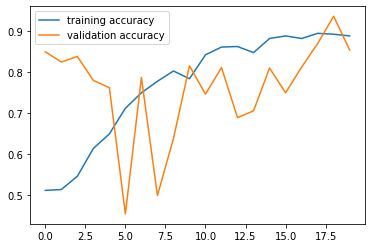

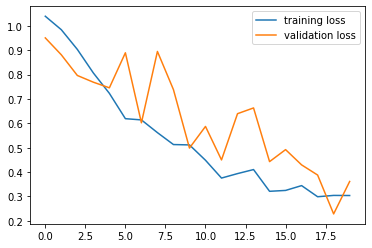

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show();

plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.legend()
plt.show();

Može se primijetiti kako točnost na testnom skupu podataka podosta varira, iako na kraju ide prema željenom rezultatu - da bude što veća.
Nadalje, trening će se nastaviti kroz veći broj epoha:

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=30,
                    epochs=50,
                    validation_steps=30,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
30/30 [==============================] - 19s 646ms/step - loss: 0.2494 - accuracy: 0.9073 - val_loss: 0.4111 - val_accuracy: 0.8344
Epoch 2/50
30/30 [==============================] - 20s 660ms/step - loss: 0.2580 - accuracy: 0.9062 - val_loss: 0.3715 - val_accuracy: 0.8510
Epoch 3/50
30/30 [==============================] - 19s 640ms/step - loss: 0.2244 - accuracy: 0.9271 - val_loss: 0.4241 - val_accuracy: 0.8323
Epoch 4/50
30/30 [==============================] - 19s 642ms/step - loss: 0.2063 - accuracy: 0.9240 - val_loss: 0.2987 - val_accuracy: 0.8938
Epoch 5/50
30/30 [==============================] - 19s 633ms/step - loss: 0.2825 - accuracy: 0.9064 - val_loss: 0.3406 - val_accuracy: 0.8750
Epoch 6/50
30/30 [==============================] - 19s 640ms/step - loss: 0.2378 - accuracy: 0.9125 - val_loss: 0.3529 - val_accuracy: 0.8719
Epoch 7/50
30/30 [==============================] - 19s 630ms/step - loss: 0.2071 - accuracy: 0.9309 - val_loss: 0.3070 - val_accuracy: 0.8948

4.2. TUMAČENJE REZULTATA
Daljnjim treniranjem model postiže odličnu točnost od čak 96,88% na testnom skupu.

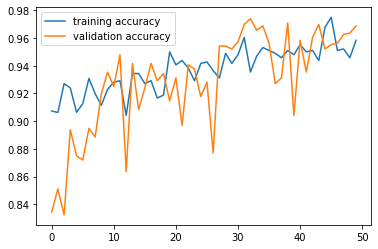

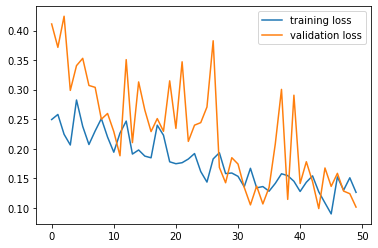

In [ ]:
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show();

plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.legend()
plt.show();

U odnosu na prošli graf točnost na testnom skupu približila se točnosti na trening skupu podataka.

**5. SPREMANJE MODELA**

In [ ]:
model_json = model.to_json()
with open("model1.json", "w") as json_file:
  json_file.write(model_json)

model.save_weights('model1.h5')

!cp model1.h5 /content/drive/MyDrive

izvor: https://splunktool.com/google-colaboratory-weight-download-export-saved-models,
https://www.geeksforgeeks.org/reading-and-writing-json-to-a-file-in-python/